#  TOYOTA   { Multi Linear Regression }

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [5]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
print('Number of Rows{}Columns'.format(data.shape))

Number of Rows(1436, 38)Columns


In [9]:
data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
#Descriptive Analysis
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data1=data.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT'})

In [17]:
data1

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age               1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  QT                1436 non-null   int64 
 17  Weight        

In [25]:
data[data.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [28]:
data=data.drop(data.index[113],axis=0).reset_index(drop=True)

In [29]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
data.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738782,0.906285,0.042424,-0.919908,0.272208,-0.108507,-0.079080,0.066069,-0.116819,...,-0.238313,-0.236065,-0.091502,-0.011400,-0.140425,-0.029395,-0.138520,-0.022766,-0.012040,0.158680
Price,-0.738782,1.000000,-0.876273,-0.014518,0.884627,-0.569420,0.314134,0.107604,0.033928,0.124375,...,0.343062,0.356115,0.064208,-0.040979,0.224925,0.166832,0.108280,0.110555,-0.042281,-0.171618
Age_08_04,0.906285,-0.876273,1.000000,-0.126066,-0.983601,0.504575,-0.155293,-0.107169,0.031354,-0.096549,...,-0.278819,-0.283002,-0.069081,0.013079,-0.128264,-0.112443,-0.120461,-0.041056,0.012144,0.188066
Mfg_Month,0.042424,-0.014518,-0.126066,1.000000,-0.054920,-0.022055,-0.038434,0.030947,0.008922,0.038367,...,0.010869,0.026043,-0.055389,0.031232,-0.034086,0.052211,0.021554,0.023044,0.032209,-0.042790
Mfg_Year,-0.919908,0.884627,-0.983601,-0.054920,1.000000,-0.503855,0.163294,0.102241,-0.033180,0.090203,...,0.278661,0.280113,0.079602,-0.018842,0.135298,0.103683,0.117328,0.037134,-0.018079,-0.181513
KM,0.272208,-0.569420,0.504575,-0.022055,-0.503855,1.000000,-0.332904,-0.079864,-0.082168,0.103822,...,-0.124428,-0.155495,0.007558,0.013247,-0.074997,-0.045498,-0.047630,-0.014132,0.015359,0.083590
HP,-0.108507,0.314134,-0.155293,-0.038434,0.163294,-0.332904,1.000000,0.058272,0.013313,0.035207,...,0.249693,0.265156,0.048765,0.021286,0.211062,-0.005588,0.012161,0.207213,0.020205,0.068721
Met_Color,-0.079080,0.107604,-0.107169,0.030947,0.102241,-0.079864,0.058272,1.000000,-0.019222,0.031346,...,0.152960,0.144784,0.086486,0.072973,0.024113,0.004097,0.038678,0.054089,0.071746,0.148881
Automatic,0.066069,0.033928,0.031354,0.008922,-0.033180,-0.082168,0.013313,-0.019222,1.000000,0.066934,...,-0.002358,-0.005716,-0.004444,-0.014671,0.002978,0.013067,-0.019209,-0.078189,-0.014221,0.018684
cc,-0.116819,0.124375,-0.096549,0.038367,0.090203,0.103822,0.035207,0.031346,0.066934,1.000000,...,0.072086,0.054719,0.032839,-0.000073,0.017743,-0.034757,-0.054521,0.003590,-0.000183,0.003157


In [31]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:43:28   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model1=smf.ols('Price~cc+Doors',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.15e-15
Time:                        12:44:18   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model2=smf.ols('Price~cc',data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.55e-06
Time:                        12:44:58   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model3=smf.ols('Price~Doors',data=data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.46e-12
Time:                        12:46:28   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
Age_r=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit().rsquared
VIF_age=1/(1-Age_r)
VIF_age

1.8846198056602876

In [39]:
KM_r=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=data1).fit().rsquared
VIF_KM=1/(1-KM_r)
VIF_KM

1.7569047782042881

In [40]:
HP_r=smf.ols('HP~KM+Age+cc+Doors+Gears+QT+Weight',data=data1).fit().rsquared
VIF_HP=1/(1-HP_r)
VIF_HP

1.4194221086310974

In [41]:
cc_r=smf.ols('cc~HP+KM+Age+Doors+Gears+QT+Weight',data=data1).fit().rsquared
VIF_cc=1/(1-cc_r)
VIF_cc

1.1638939849423795

In [42]:
Gear_r=smf.ols('Gears~cc+HP+KM+Age+Doors+QT+Weight',data=data1).fit().rsquared
VIF_Gear=1/(1-Gear_r)
VIF_Gear

1.098723019347037

In [43]:
Doors_r=smf.ols('Doors~Gears+cc+HP+KM+Age+QT+Weight',data=data1).fit().rsquared
VIF_Doors=1/(1-Doors_r)
VIF_Doors

1.156575207076043

In [44]:
Tax_r=smf.ols('QT~Doors+Gears+cc+HP+KM+Age+Weight',data=data1).fit().rsquared
VIF_QT=1/(1-Tax_r)
VIF_QT

2.311430811531037

In [45]:
Weight_r=smf.ols('Weight~QT+Doors+Gears+cc+HP+KM+Age',data=data1).fit().rsquared
VIF_Weight=1/(1-Weight_r)
VIF_Weight

2.5164198374458695

In [46]:
# as all VIF value is less than 10 and 20 so there is nocolinearity problem in data
x={'Variable':['Doors', 'QT','Gears','cc','HP','KM','age','Weight'],'VIF':[VIF_Doors,VIF_QT,VIF_Gear,VIF_cc,VIF_HP,VIF_KM,VIF_age,VIF_Weight]}
pd.DataFrame(x)

,Variable,VIF
0,Doors,1.156575
1,QT,2.311431
2,Gears,1.098723
3,cc,1.163894
4,HP,1.419422
5,KM,1.756905
6,age,1.884620
7,Weight,2.516420


In [47]:
#now check for error term is it normaly distributed or not
#1st method mean of residual should be zero
#2nd method qq plot
residual=round(model.resid.mean(),3)

In [48]:
residual

0.0

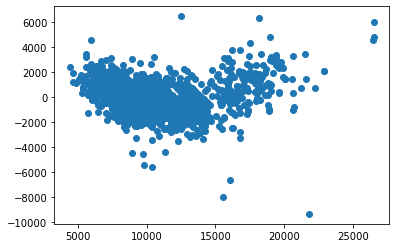

In [49]:
plt.scatter(model.fittedvalues,model.resid)

In [50]:
influencer=model.get_influence()
(c,_)=influencer.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<StemContainer object of 3 artists>

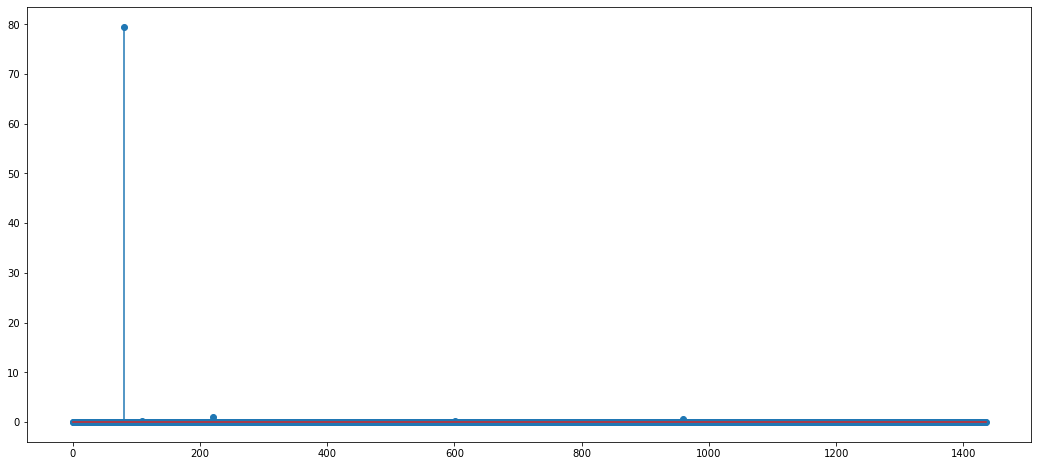

In [51]:
fig=plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(data1)),c)

In [52]:
np.argmax(c),np.max(c)

(80, 79.52010624138717)

In [53]:
data1.drop(data1.index[80],axis=0,inplace=True)
data1.reset_index(drop=True)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1435 non-null   int64 
 1   Model             1435 non-null   object
 2   Price             1435 non-null   int64 
 3   Age               1435 non-null   int64 
 4   Mfg_Month         1435 non-null   int64 
 5   Mfg_Year          1435 non-null   int64 
 6   KM                1435 non-null   int64 
 7   Fuel_Type         1435 non-null   object
 8   HP                1435 non-null   int64 
 9   Met_Color         1435 non-null   int64 
 10  Color             1435 non-null   object
 11  Automatic         1435 non-null   int64 
 12  cc                1435 non-null   int64 
 13  Doors             1435 non-null   int64 
 14  Cylinders         1435 non-null   int64 
 15  Gears             1435 non-null   int64 
 16  QT                1435 non-null   int64 
 17  Weight        

In [55]:
model1=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit()

In [56]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:00:17   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

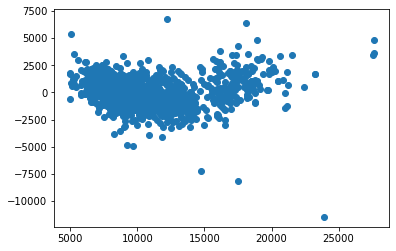

In [57]:
plt.scatter(model1.fittedvalues,model1.resid)

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
influencer=model1.get_influence()
(c,_)=influencer.cooks_distance
c

array([6.76188181e-03, 3.63236662e-03, 4.92319660e-03, ...,
       3.63997681e-06, 9.09665729e-04, 9.71186915e-03])

<StemContainer object of 3 artists>

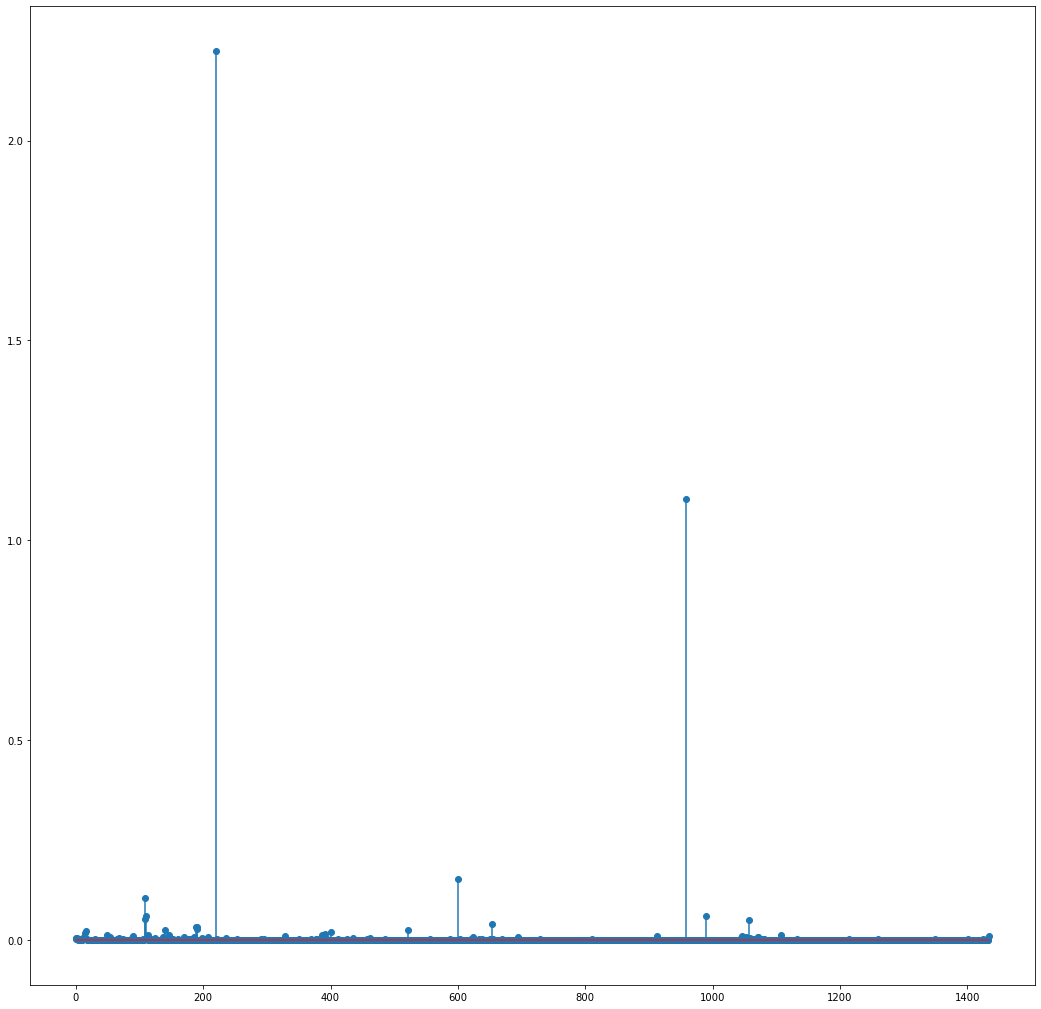

In [60]:
fig=plt.subplots(figsize=(18,18))
plt.stem(np.arange(len(data1)),c)

In [61]:
np.argmax(c),np.max(c)

(220, 2.2244611713001383)

In [62]:
data=data1.drop(data1.index[219],axis=0)
data.reset_index(drop=True)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
model2=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:02:59   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

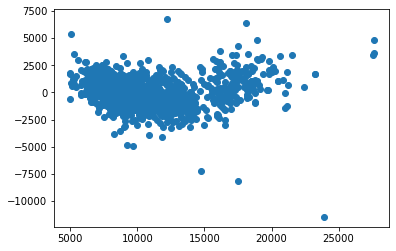

In [65]:
plt.scatter(model2.fittedvalues,model2.resid)

In [66]:
influencer=model2.get_influence()
(c,_)=influencer.cooks_distance
c

array([6.76188181e-03, 3.63236662e-03, 4.92319660e-03, ...,
       3.63997681e-06, 9.09665729e-04, 9.71186915e-03])

<StemContainer object of 3 artists>

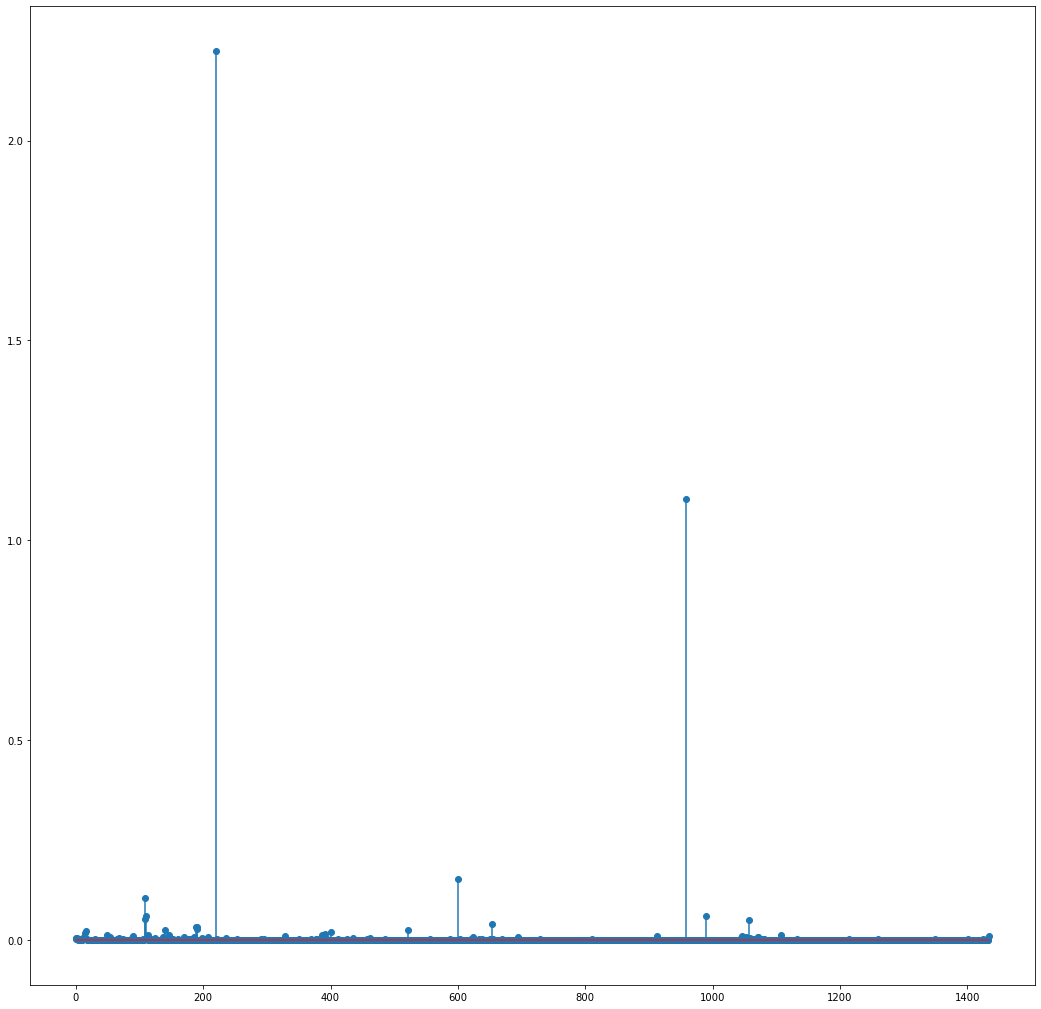

In [68]:
fig=plt.subplots(figsize=(18,18))
plt.stem(np.arange(len(data1)),c)

In [69]:
np.argmax(c),np.max(c)

(220, 2.2244611713001383)

In [70]:
data=data1.drop(data.index[957],axis=0)
data.reset_index(drop=True)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [72]:
model3=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:05:50   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

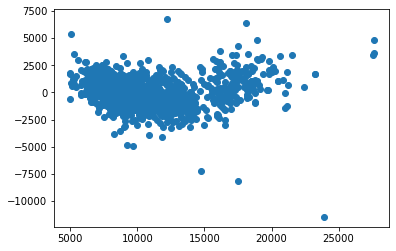

In [73]:
plt.scatter(model3.fittedvalues,model3.resid)

eval_env: 1


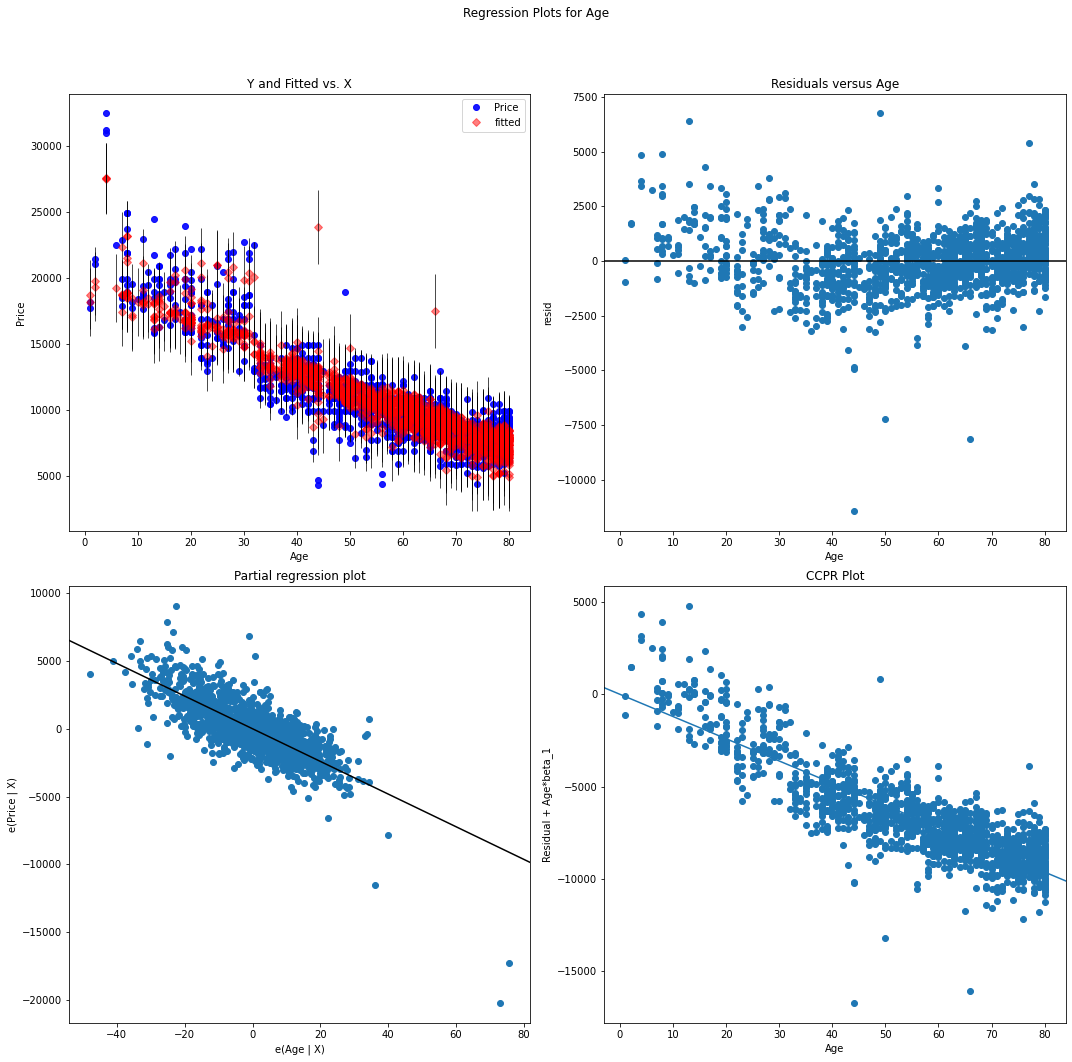

In [77]:
import statsmodels.api as sm
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'Age',fig=fig)

eval_env: 1


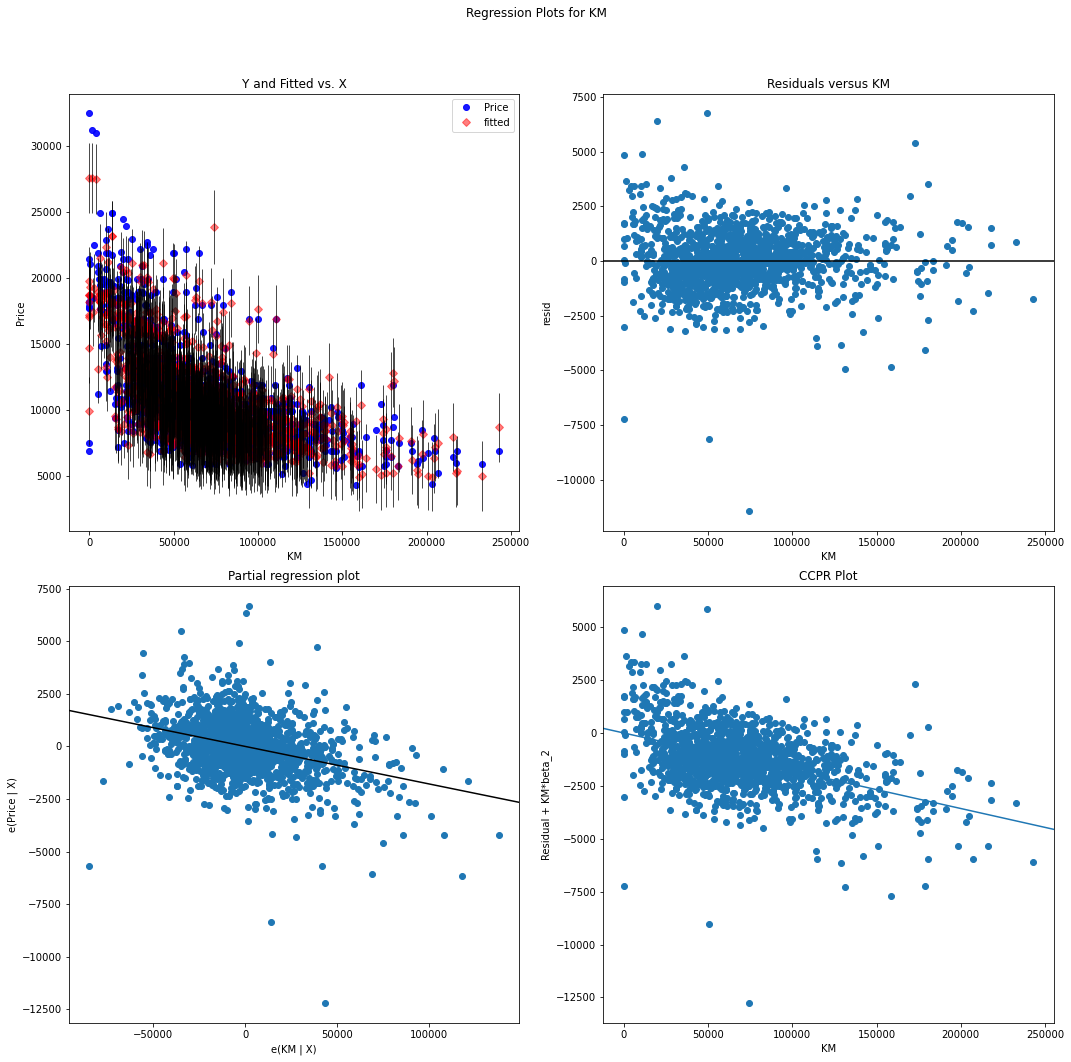

In [78]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'KM',fig=fig)

eval_env: 1


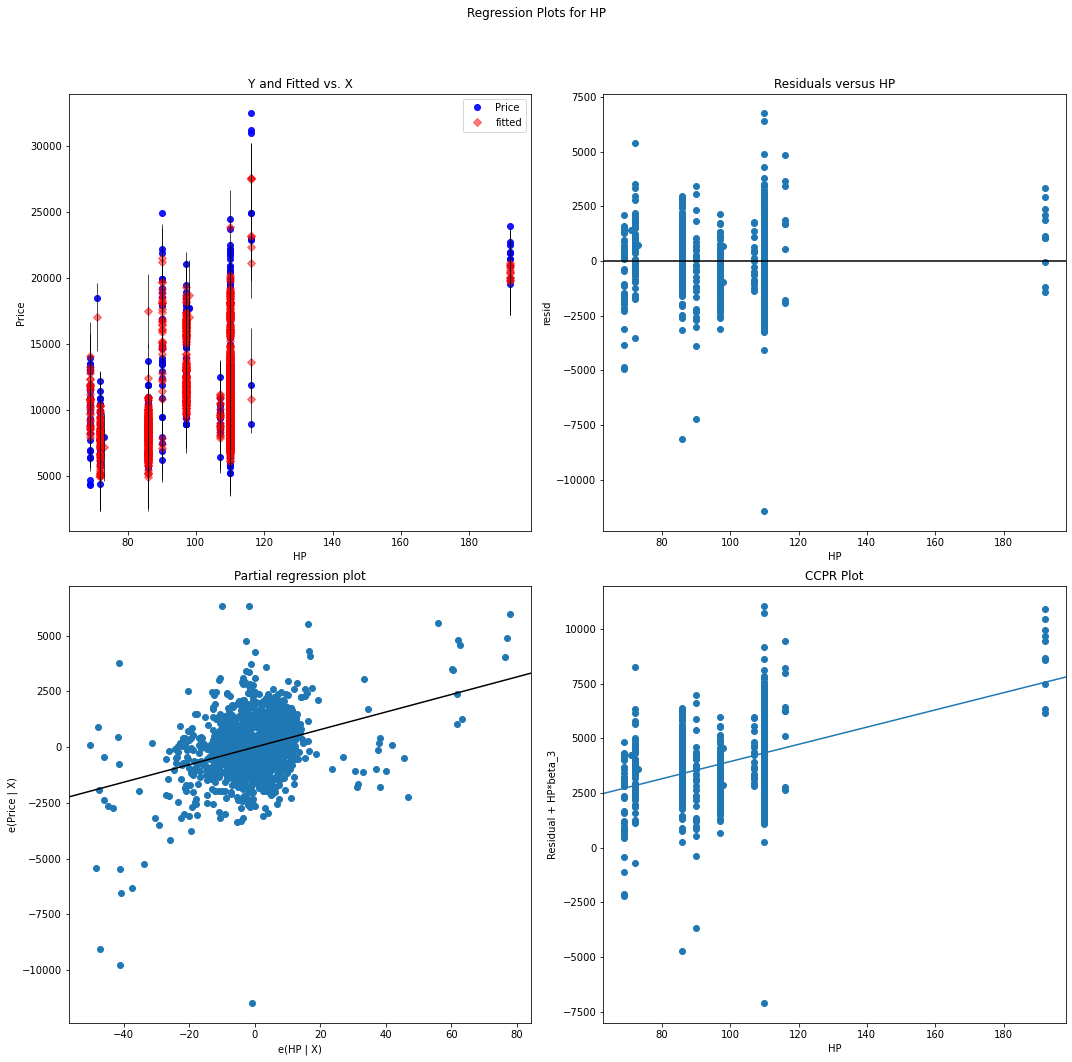

In [79]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'HP',fig=fig)

eval_env: 1


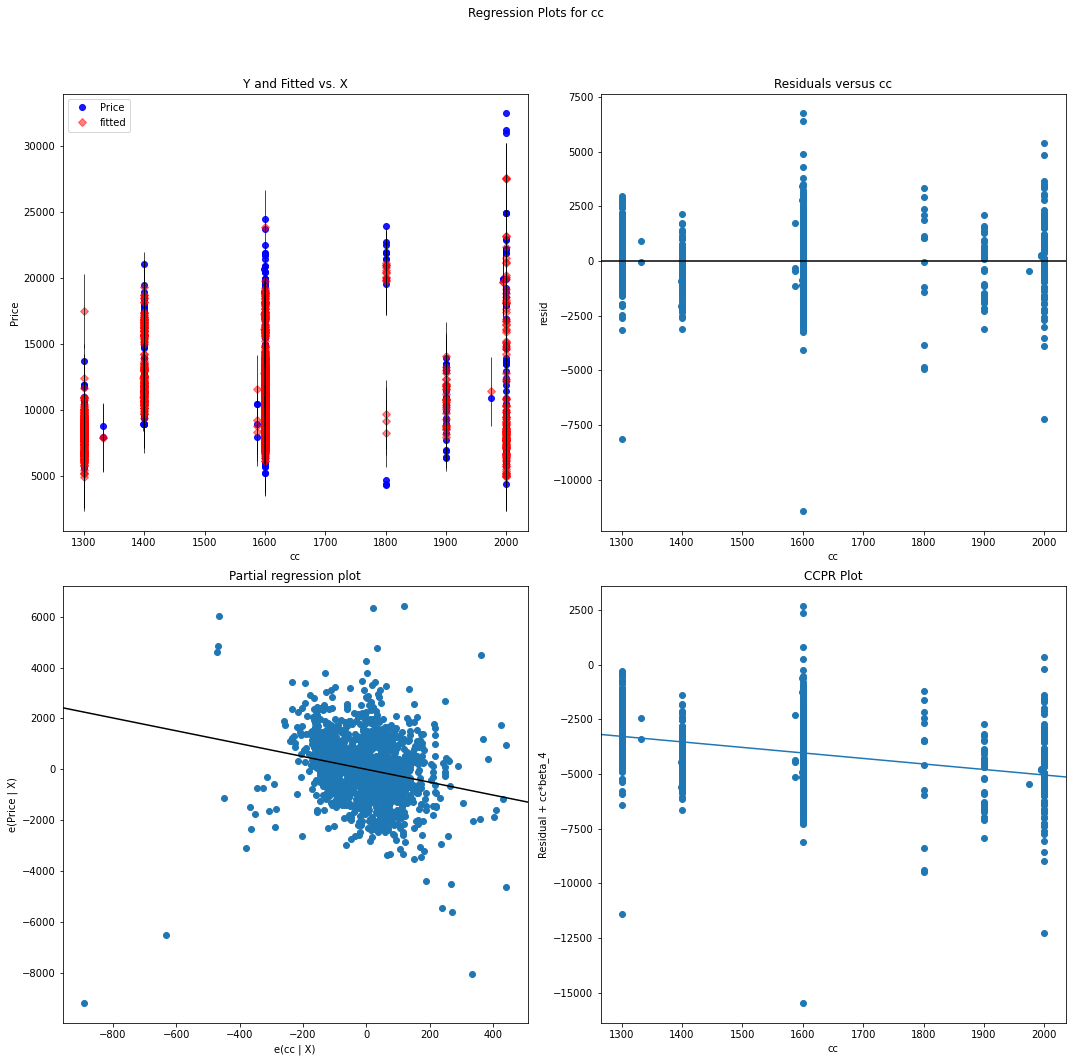

In [80]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'cc',fig=fig)

eval_env: 1


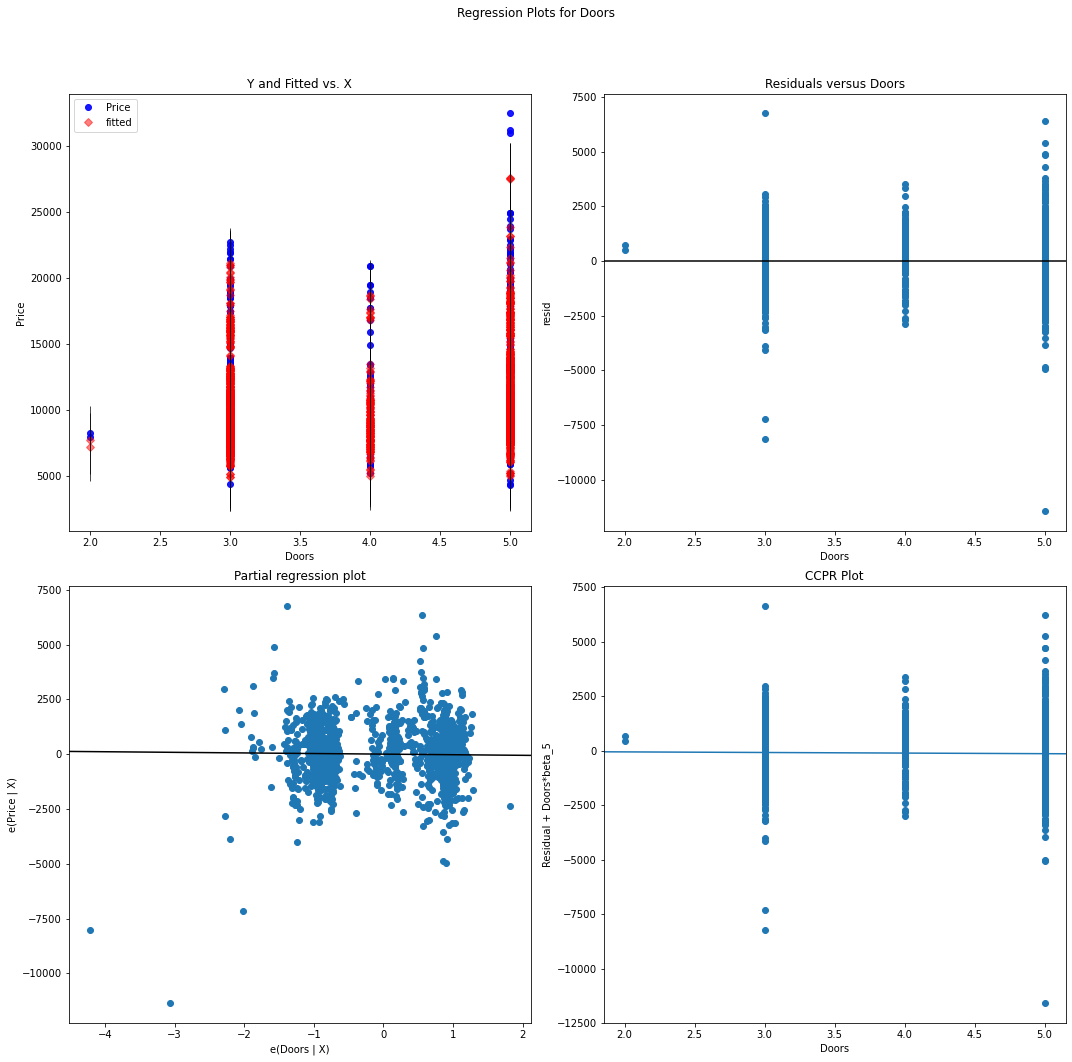

In [81]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'Doors',fig=fig)

eval_env: 1


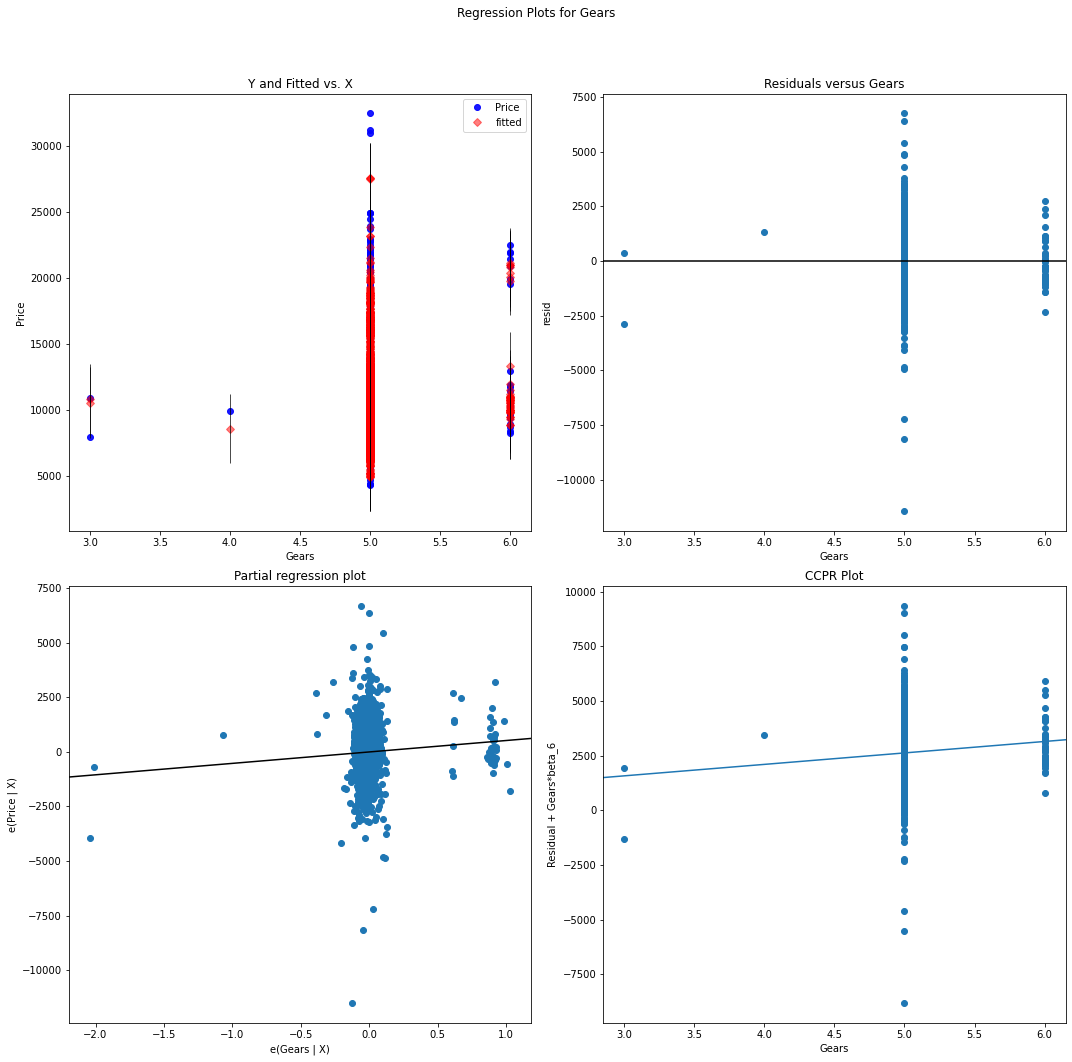

In [82]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'Gears',fig=fig)

eval_env: 1


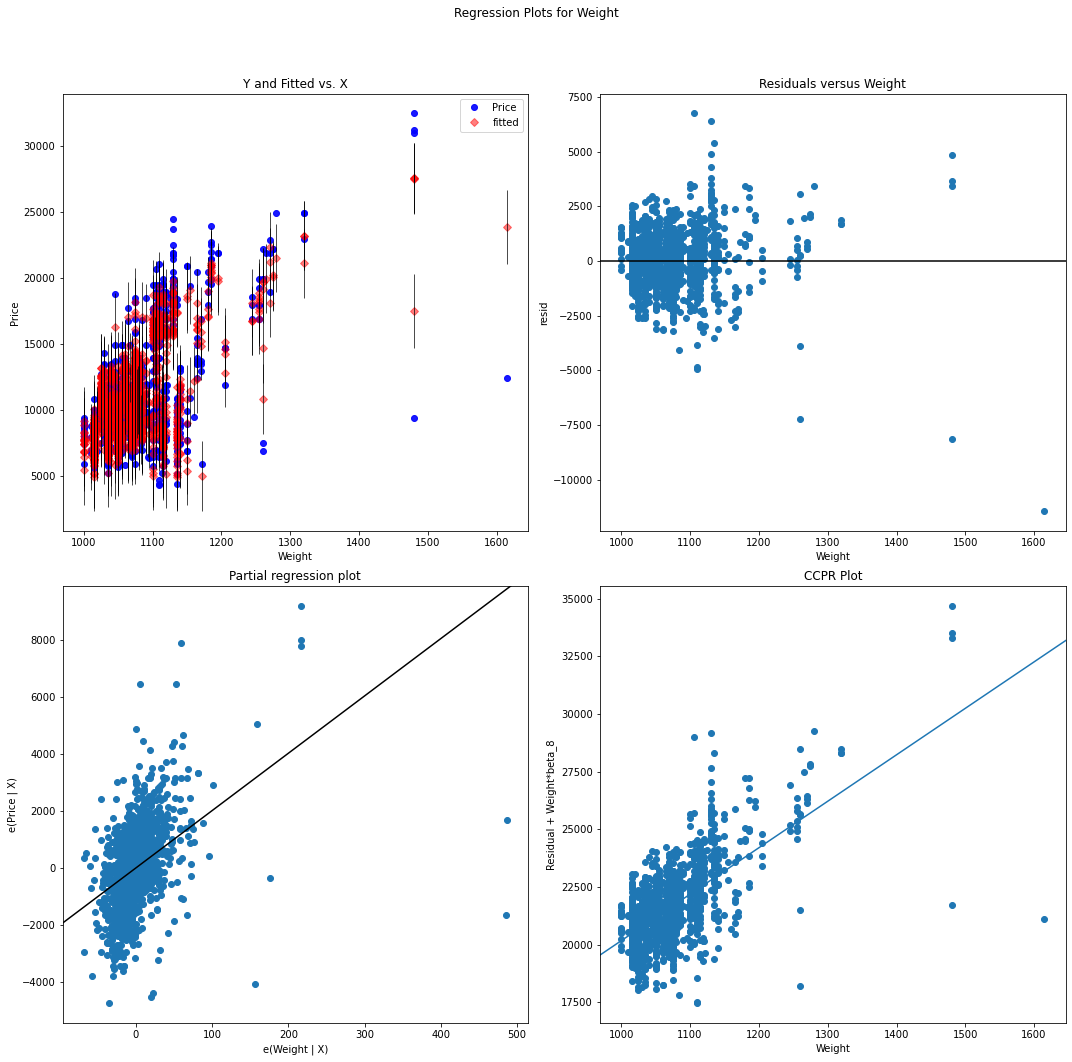

In [83]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'Weight',fig=fig)

eval_env: 1


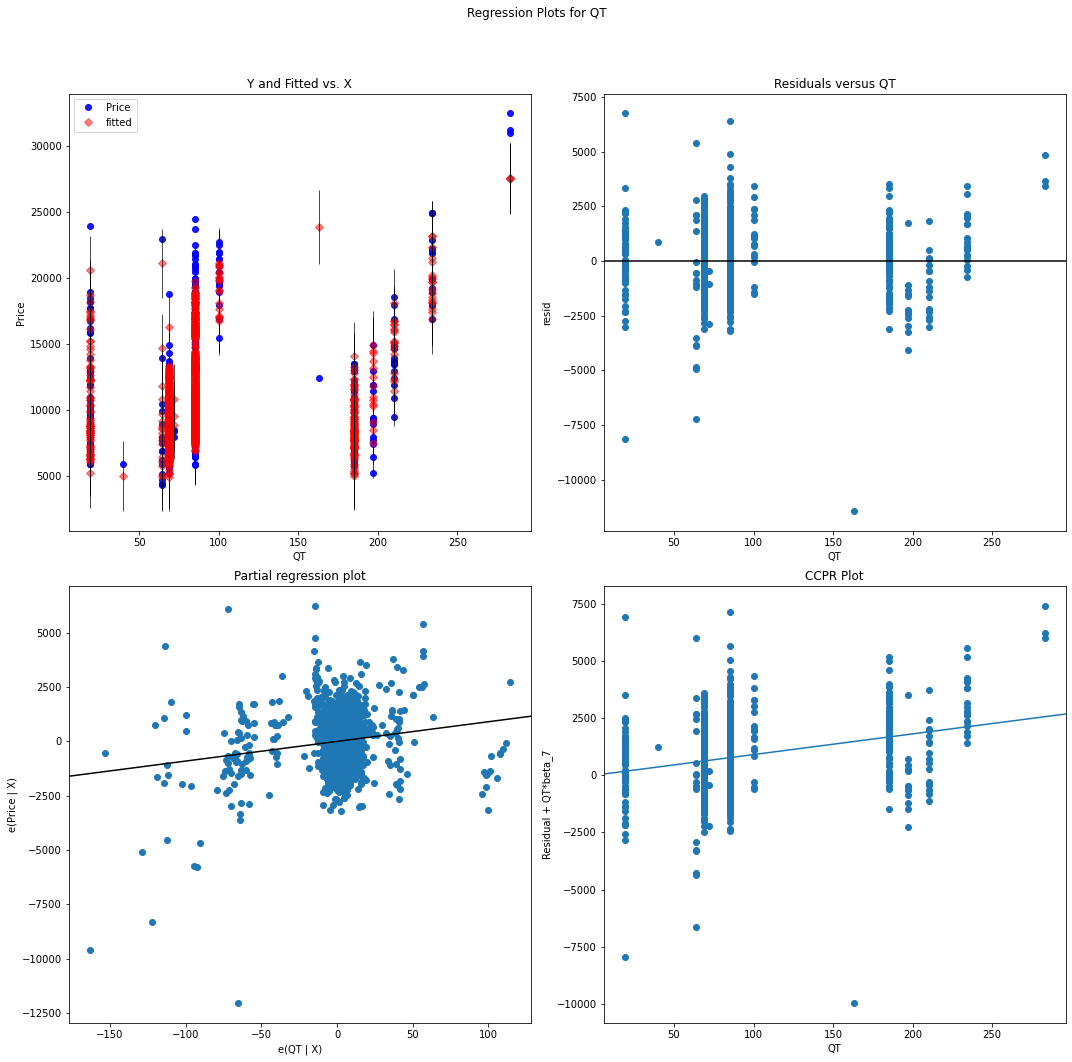

In [84]:
fig=plt.figure(figsize=(15,15))
fig=sm.graphics.plot_regress_exog(model3,'QT',fig=fig)

In [85]:
data=data1.drop(columns="Doors")
data1

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [86]:
model4=smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data=data1).fit()

In [87]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:11:23   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears        549.7311    189.216      2.905      0.004     178.561     920.902
QT             9.0759      1.424      6.374      0.000       6.283      11.869
Weight        19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
final_model=model3
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:11:33   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""